In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import json



In [2]:

# Define the graph as a dictionary
graph_dict = {
    "A": {"B": {"volume": "?"}, "C": {"volume": 3},   "D": {"volume": 2}},
    "B": {"A": {"volume": "?"}, "E": {"volume": 3},   "F": {"volume": 6}},
    "C": {"A": {"volume": 4},   "G": {"volume": "?"}, "H": {"volume": 3}},
    "D": {"A": {"volume": 3},   "I": {"volume": 6},   "J": {"volume": 8}},
    "E": {"B": {"volume": 5},   "K": {"volume": 7}},
    "F": {"B": {"volume": 7},   "L": {"volume": 4}},
    "G": {"C": {"volume": "?"}, "M": {"volume": 6}},
    "H": {"C": {"volume": 3},   "N": {"volume": 5}},
    "I": {"D": {"volume": 7},   "O": {"volume": 5}},
    "J": {"D": {"volume": 7},   "P": {"volume": 8}},
    "K": {"E": {"volume": 8}},
    "L": {"F": {"volume": 3}},
    "M": {"G": {"volume": 7}},
    "N": {"H": {"volume": 2}},
    "O": {"I": {"volume": 10}},
    "P": {"J": {"volume": 8}},
}


In [3]:

# Save graph_dict as json for further usage
with open("graphJson.json", "w") as f:
    json.dump(graph_dict, f, indent=4)


In [4]:

# Create an empty directed graph
G = nx.DiGraph()


In [5]:

# Iterate through the dictionary and add edges along with their attributes
for node, neighbors in graph_dict.items():
    for neighbor, attributes in neighbors.items():
        G.add_edge(node, neighbor, **attributes)



In [6]:

# def compute_mean_volume(G, node1, node2):
#     neighbor_volumes = []
#     for neighbor in G.neighbors(node1):
#         if neighbor != node2:
#             edge_volume = G[node1][neighbor]["volume"]
#             if edge_volume != "?":
#                 neighbor_volumes.append(edge_volume)
    
#     for neighbor in G.neighbors(node2):
#         if neighbor != node1:
#             edge_volume = G[node2][neighbor]["volume"]
#             if edge_volume != "?":
#                 neighbor_volumes.append(edge_volume)
    
#     return round(sum(neighbor_volumes) / len(neighbor_volumes)) if neighbor_volumes else "?"

In [7]:
def compute_mean_volume(G, node1, node2):
    neighbor_volumes = []
    for neighbor in G.neighbors(node1):
        if neighbor != node2:
            edge_volume = G[node1][neighbor]["volume"]
            if edge_volume != "?":
                neighbor_volumes.append(edge_volume)
    
    for neighbor in G.neighbors(node2):
        if neighbor != node1:
            edge_volume = G[node2][neighbor]["volume"]
            if edge_volume != "?":
                neighbor_volumes.append(edge_volume)
    
    total_volumes = sum(neighbor_volumes)
    total_edges = len(neighbor_volumes)
    
    if total_edges == 0:
        return "?"

    return round(total_volumes / total_edges)

In [8]:
# Fill missing volumes using the mean of neighboring volumes
for u, v, data in G.edges(data=True):
    if data["volume"] == "?":
        mean_volume = compute_mean_volume(G, u, v)
        if mean_volume != "?":
            data["volume"] = mean_volume
            G[v][u]["volume"] = mean_volume

In [9]:
H=G.to_undirected()

In [10]:

pos = nx.spring_layout(H, seed=2)
labels = {(u, v): data["volume"] for u, v, data in H.edges(data=True)}


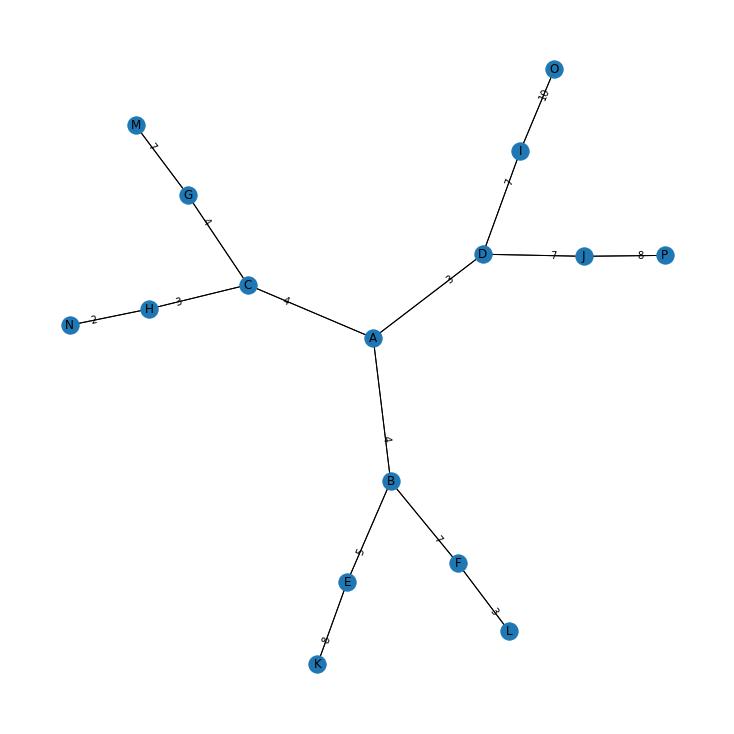

In [11]:

plt.figure(figsize=(10, 10))
nx.draw(H, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(
    H, pos, labels, label_pos=0.3, bbox=dict(alpha=0), font_size=10
)
nx.draw_networkx_edges(H, pos, arrows=True)
plt.savefig("undirected_digraphFromDict.png", dpi=400)
plt.show()